## Vertex AI: Predicting Loan Risk with AutoML

### Overview

In this lab, you use [Vertex AI](https://cloud.google.com/ai-platform-unified/docs?utm_source=codelabs&utm_medium=et&utm_campaign=CDR_sar_aiml_vertexio_&utm_content=-) to train and serve a machine learning model to predict loan risk with a tabular dataset.

### Objectives

You learn how to:

- Upload a dataset to Vertex AI.
- Train a machine learning model with AutoML.
- Evaluate the model performance.
- Deploy the model to an endpoint.
- Get predictions.

### Introduction to Vertex AI

This lab uses Vertex AI, the unified AI platform on Google Cloud to train and deploy a ML model. Vertex AI offers two options on one platform to build a ML model: a codeless solution with AutoML and a code-based solution with Custom Training using Vertex Workbench. You use AutoML in this lab.

In this lab you build a ML model to determine whether a particular customer will repay a loan.


### Task 1. Prepare the training data

The initial Vertex AI dashboard illustrates the major stages to train and deploy a ML model: prepare the training data, train the model, and get predictions. Later, the dashboard displays your recent activities, such as the recent datasets, models, predictions, endpoints, and notebook instances.

### Create a dataset
1. In the Google Cloud console, on the Navigation menu, click Vertex AI > Datasets.

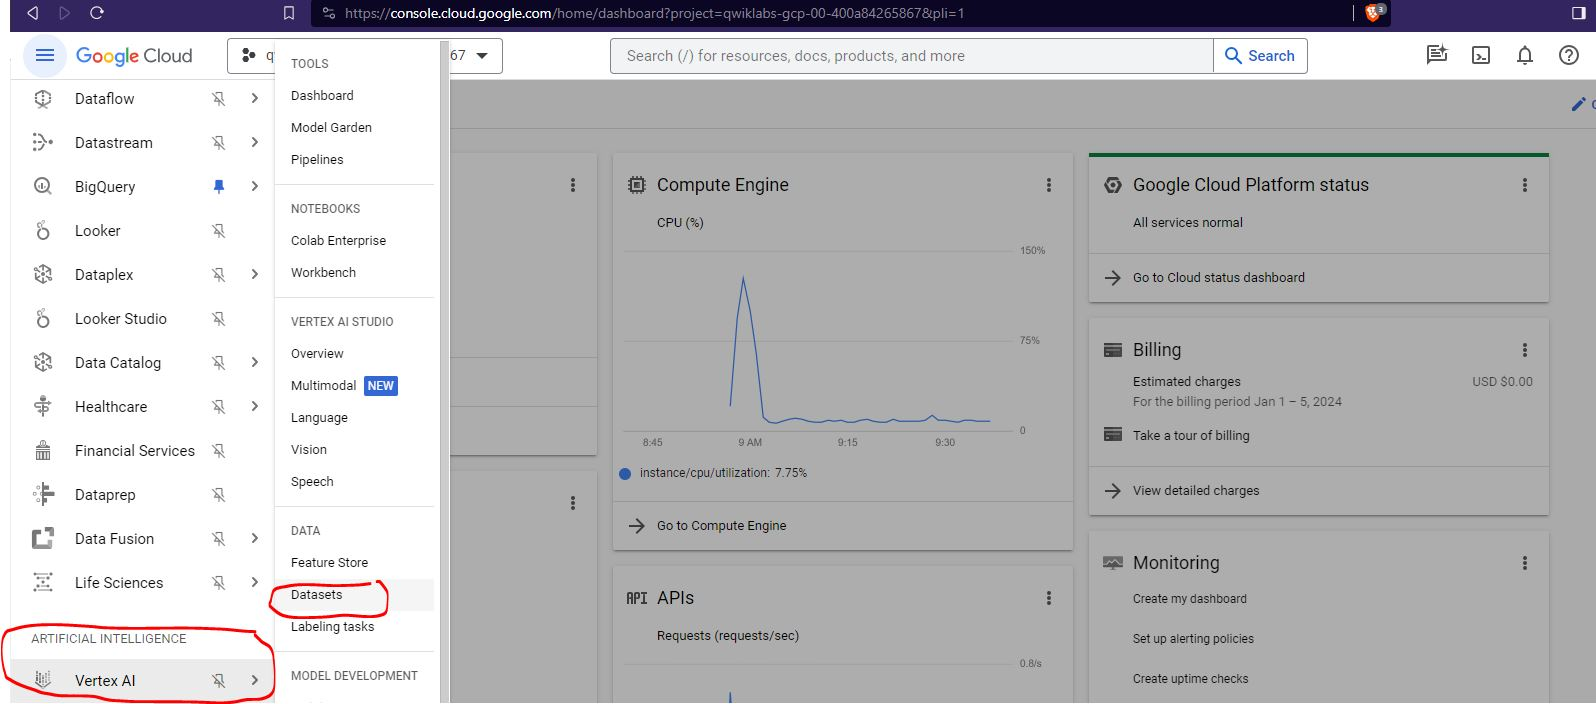

2. Click `Create dataset`.

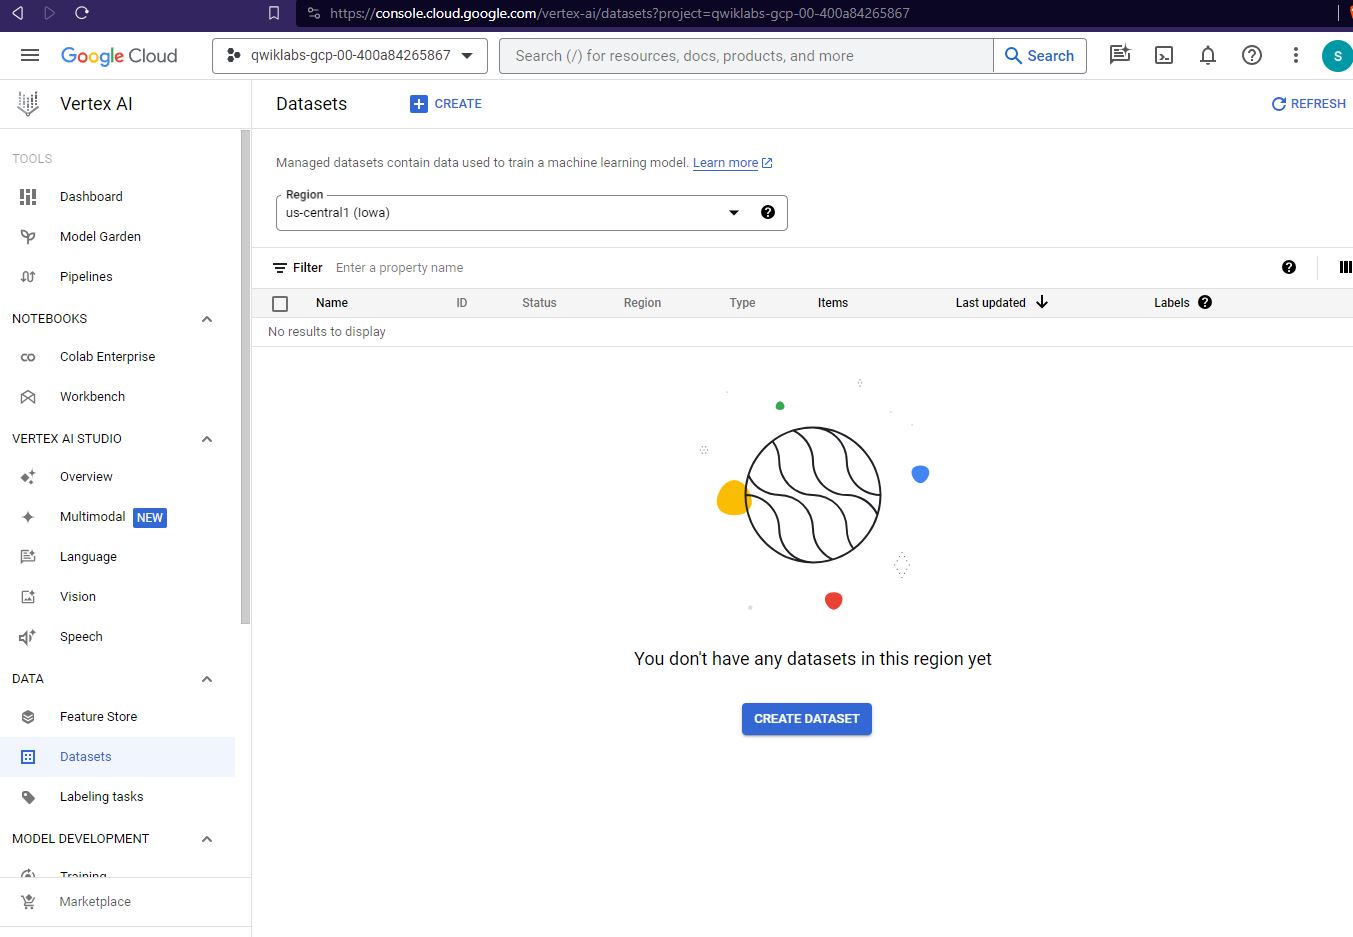

3. Give dataset a name `Loan_Risk`.
4. For the data type and objective, click `Tabular`, and then select `Regression/classification`.
5. Click `Create`.

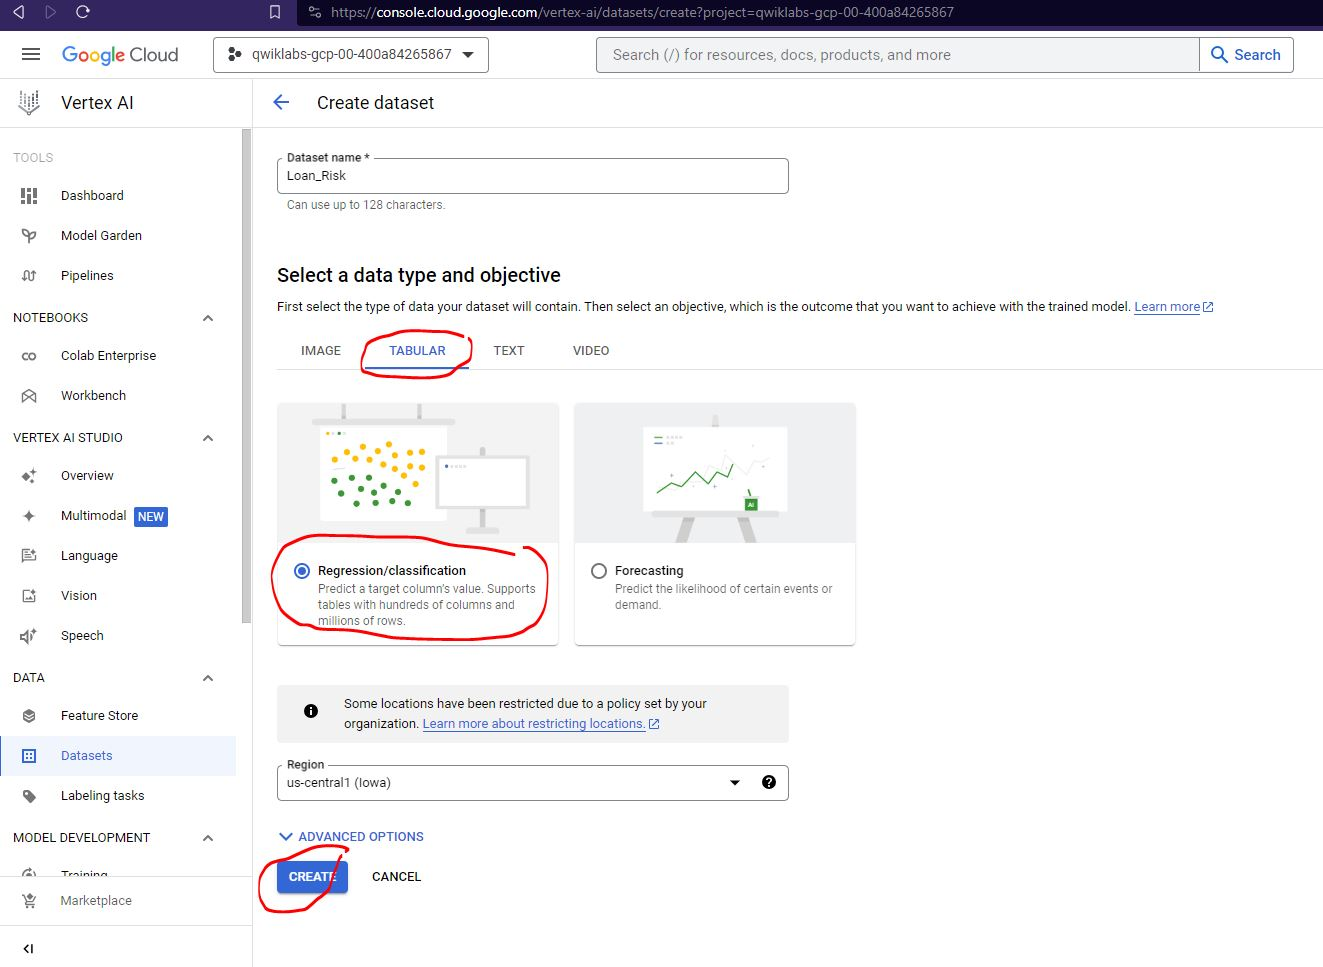


### Upload data
There are three options to import data in Vertex AI:

1. Upload a local file from your computer.

2. Select files from Cloud Storage.

3. Select data from BigQuery.

For convenience, the dataset is already uploaded to Cloud Storage.

1. For the data source, select `Select CSV files from Cloud Storage`.

2. For Import file path, enter:

        spls/cbl455/loan_risk.csv
        
3. Click `Continue`.

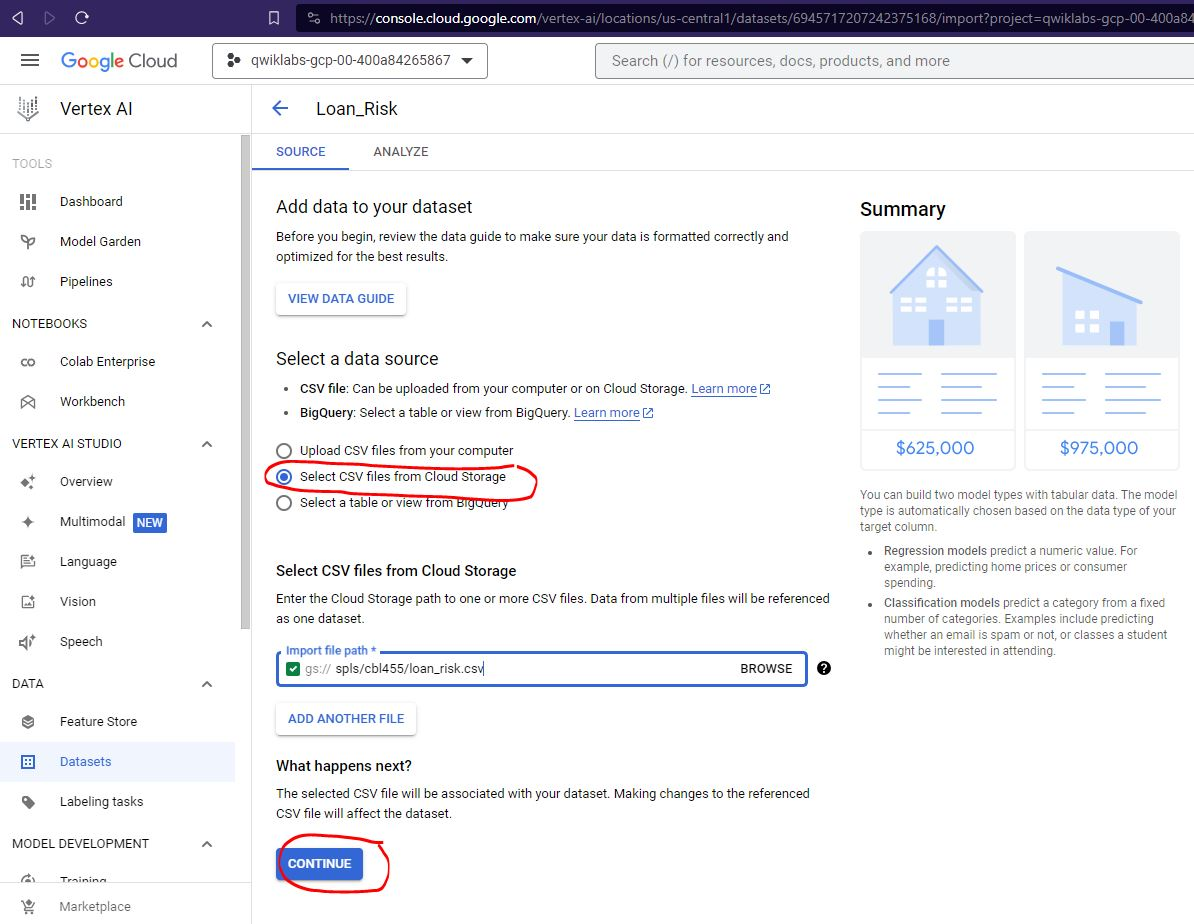

>Note: You can also configure this page by clicking Datasets on the left menu and then selecting the dataset name on the Datasets page.

### Generate statistics

1. To see the descriptive statistics for each column of your dataset, click `GENERATE STATISTICS`.

Generating the statistics might take a few minutes, especially the first time.

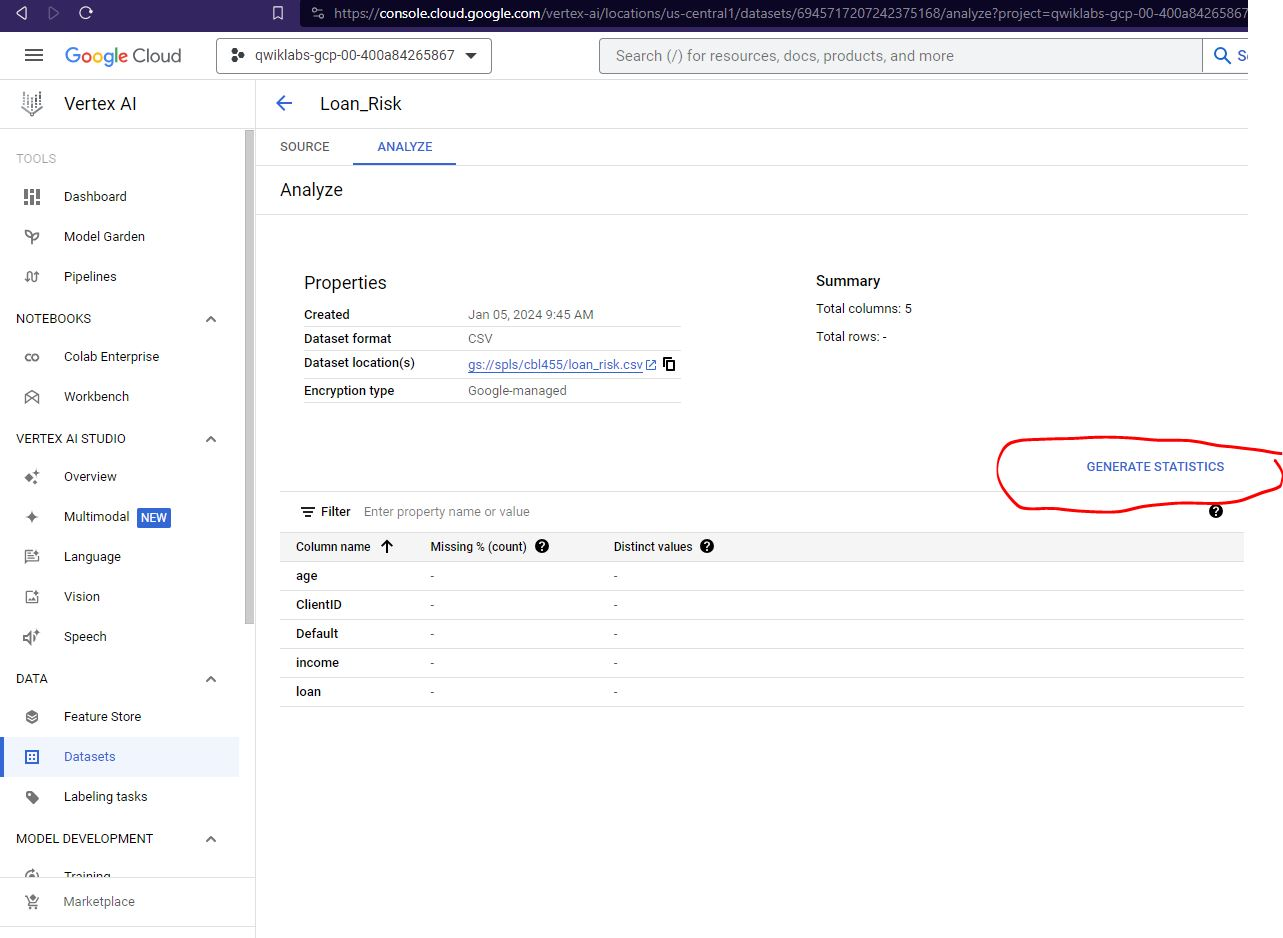

2. When the statistics are ready, click each column name to display analytical charts.

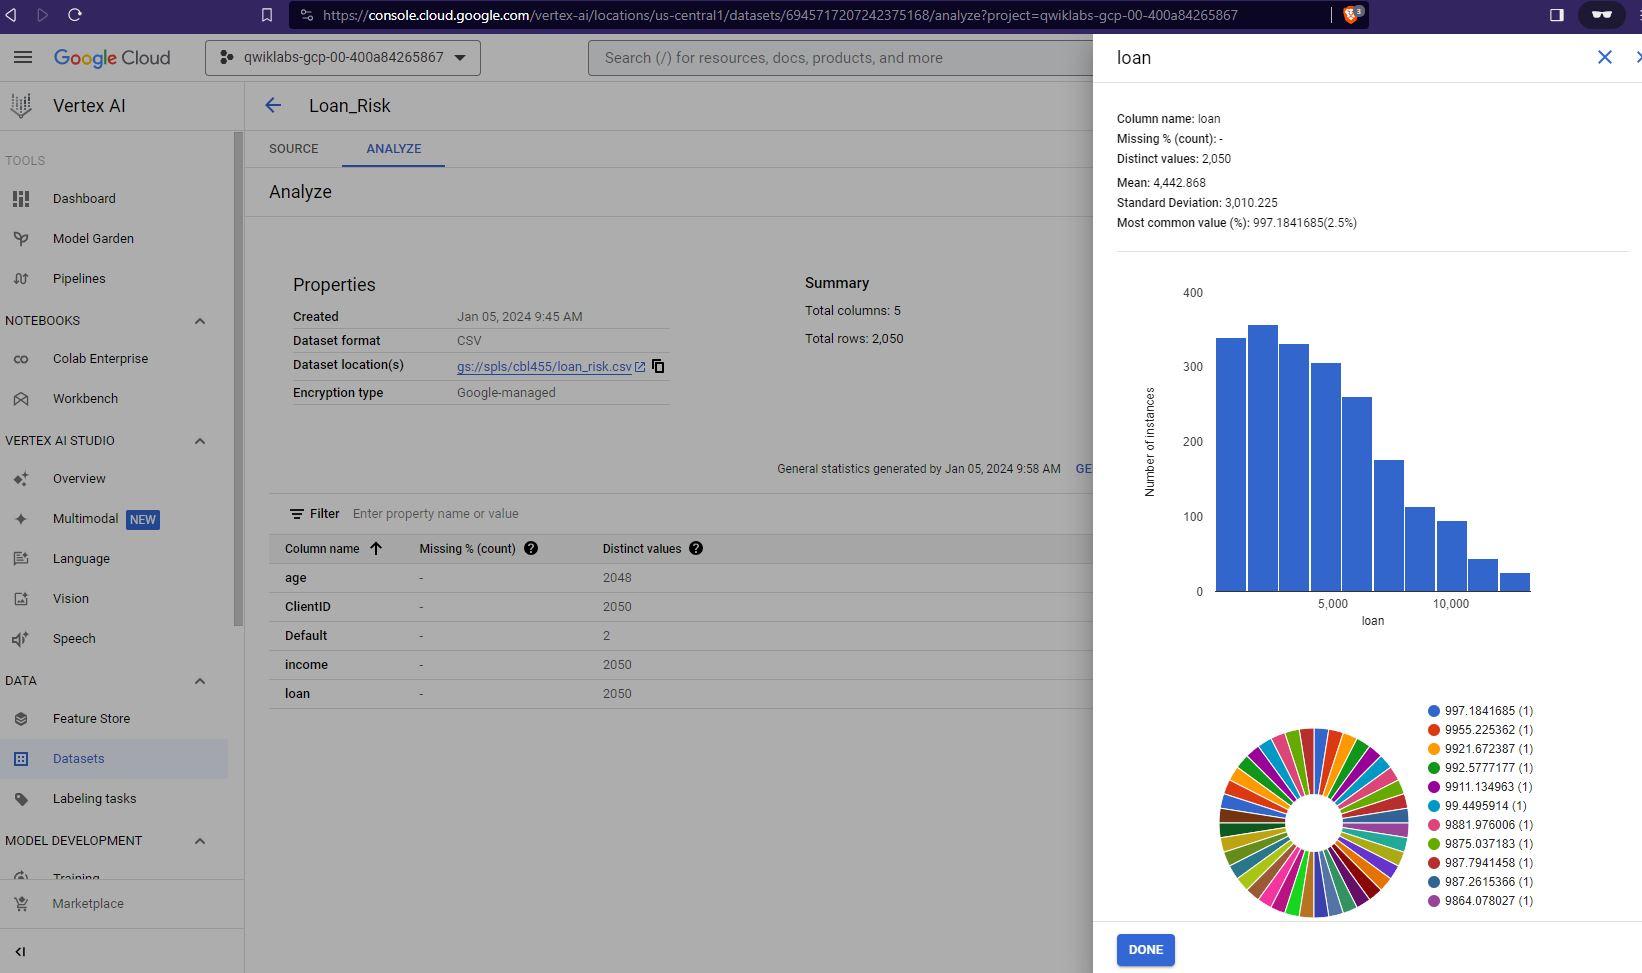

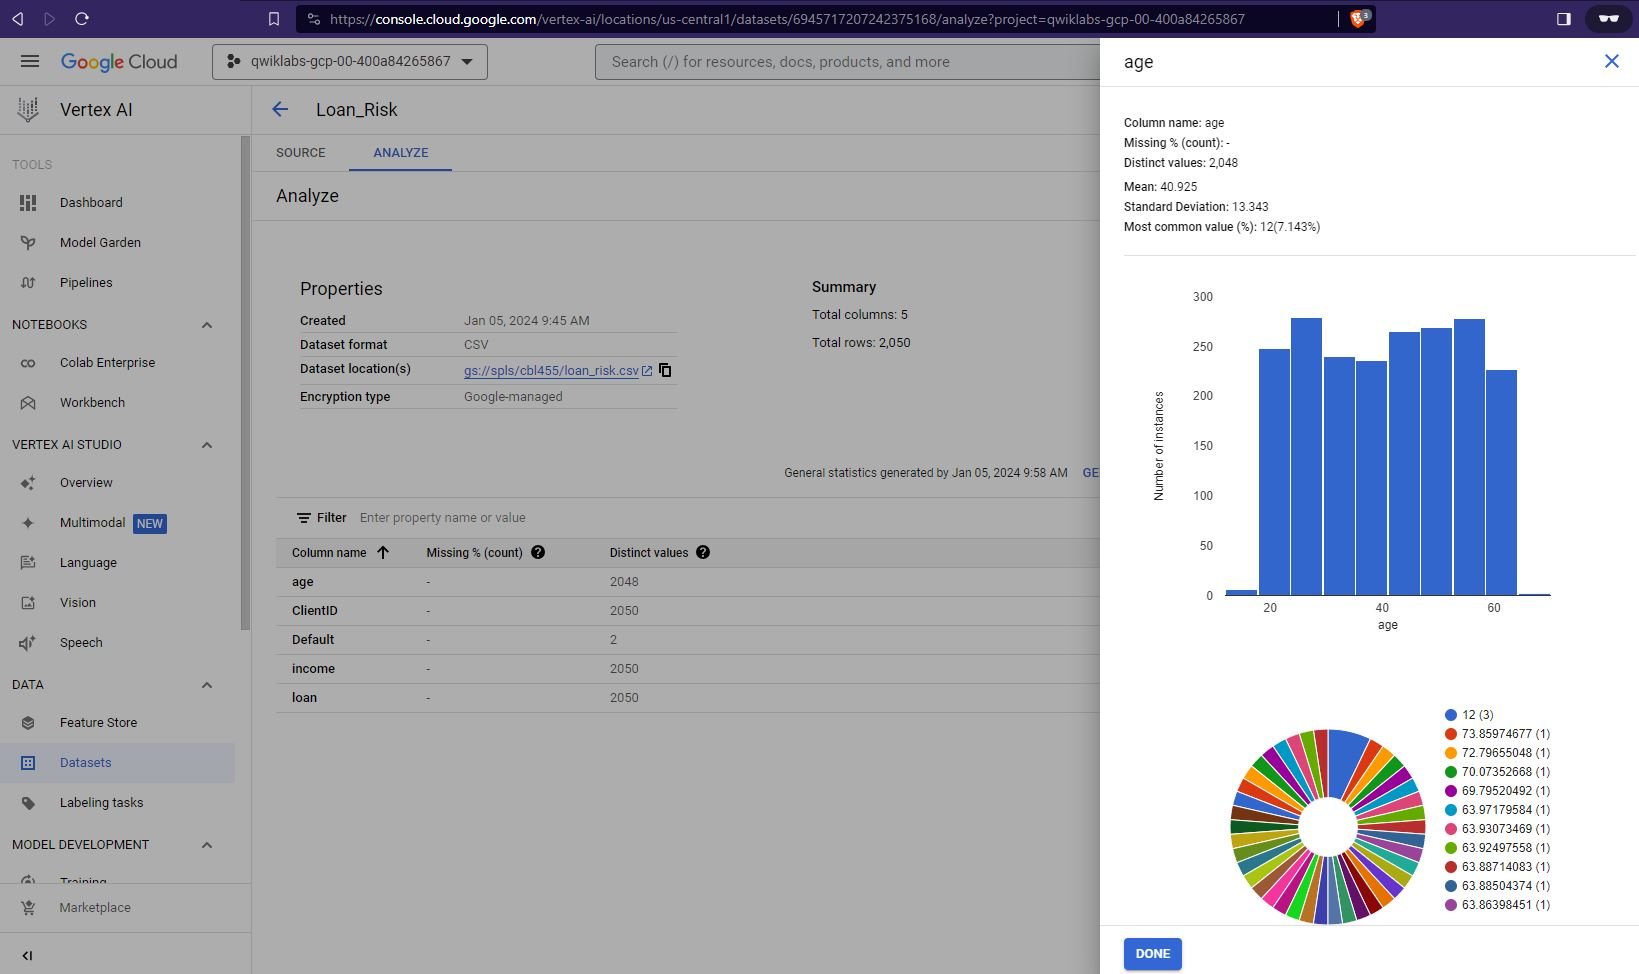


### Task 2. Train your model

With a dataset uploaded, you're ready to train a model to predict whether a customer will repay the loan.

- Click `TRAIN NEW MODEL` and select `Other`.

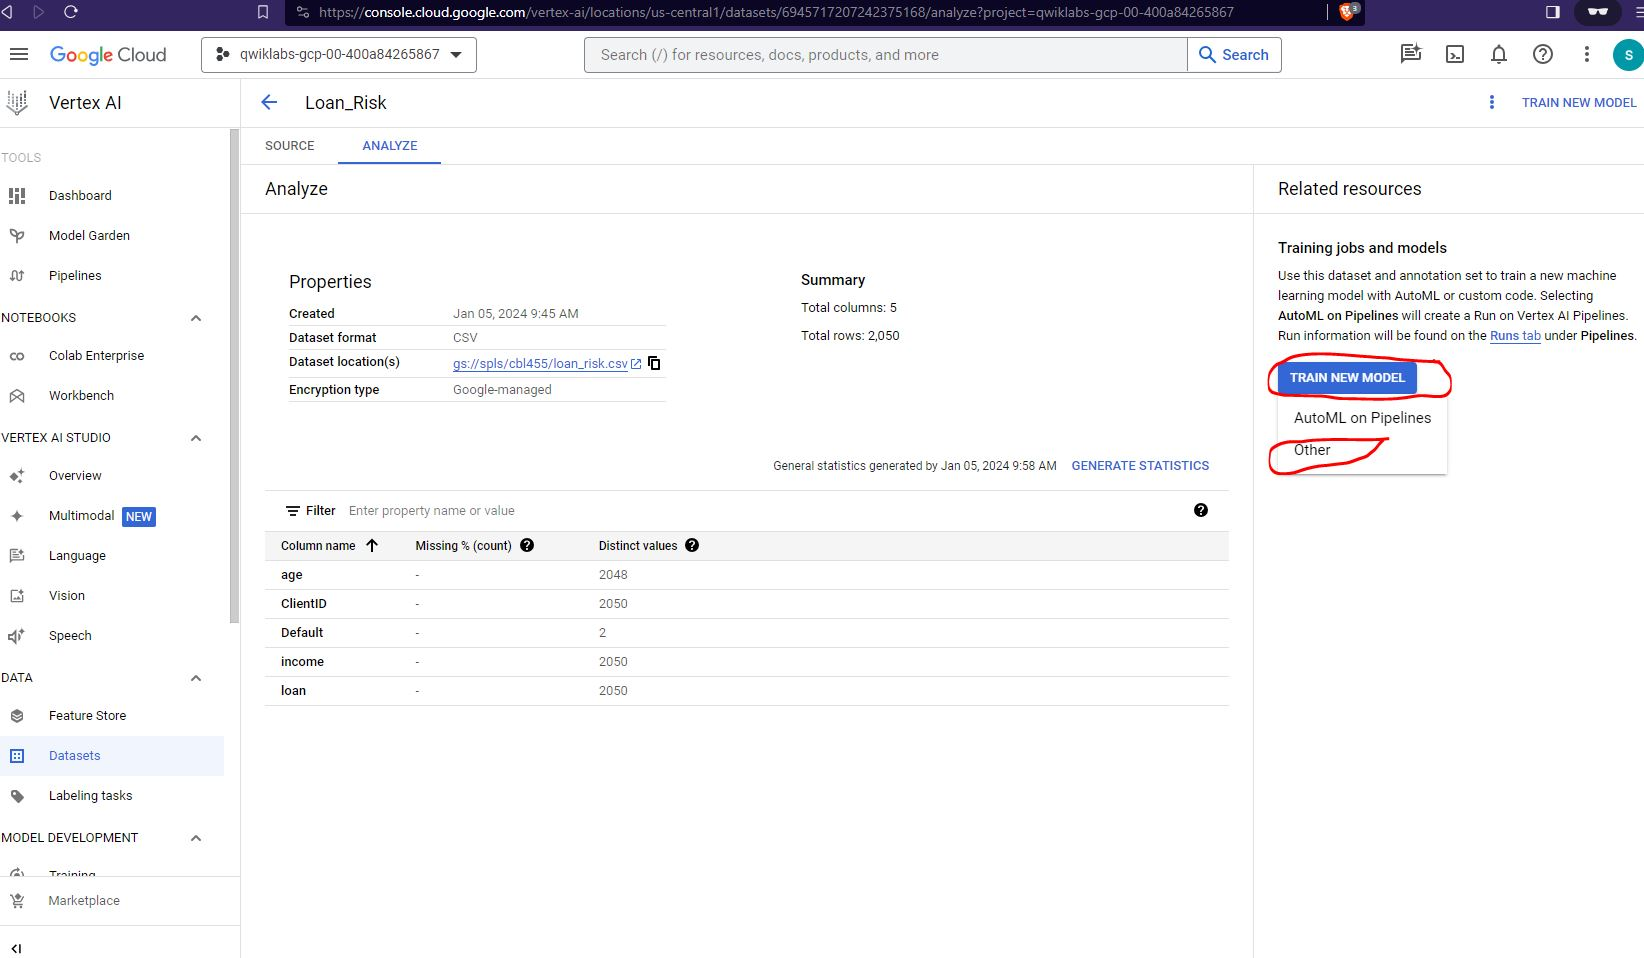

### Training method
1. The dataset is already named `Loan_Risk`.

2. For Objective, select `Classification`.

You select classification instead of regression because you are predicting a distinct number (whether a customer will repay a loan: 0 for repay, 1 for default/not repay) instead of a continuous number.

3. Click `Continue`.

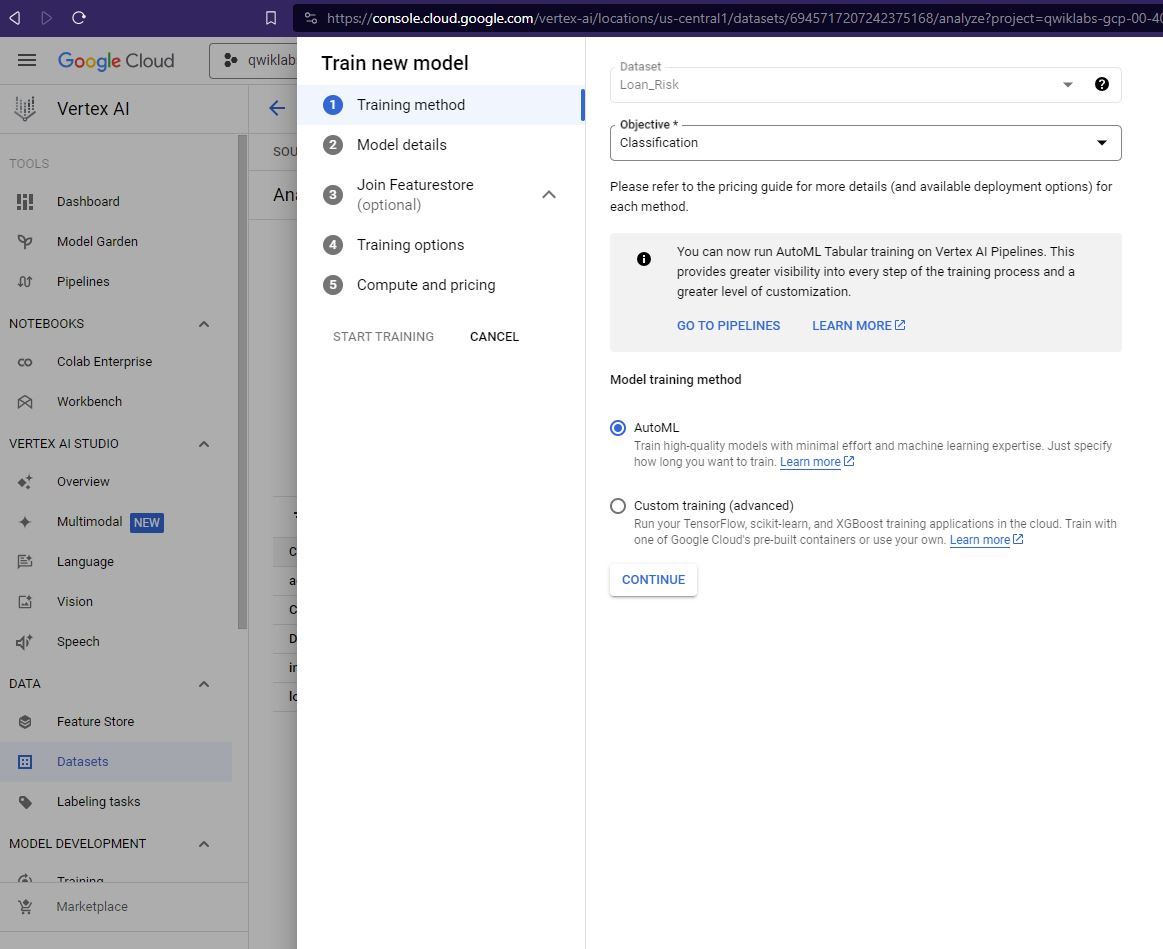

### Model details
Specify the name of the model and the target column.

1. Give the model a name, such as `Loan_Risk`.

2. For Target column, select `Default`.

3. (Optional) Explore Advanced options to determine how to assign the training vs. testing data and specify the encryption.

4. Click `Continue`.

5. For Add features, click `Continue`.

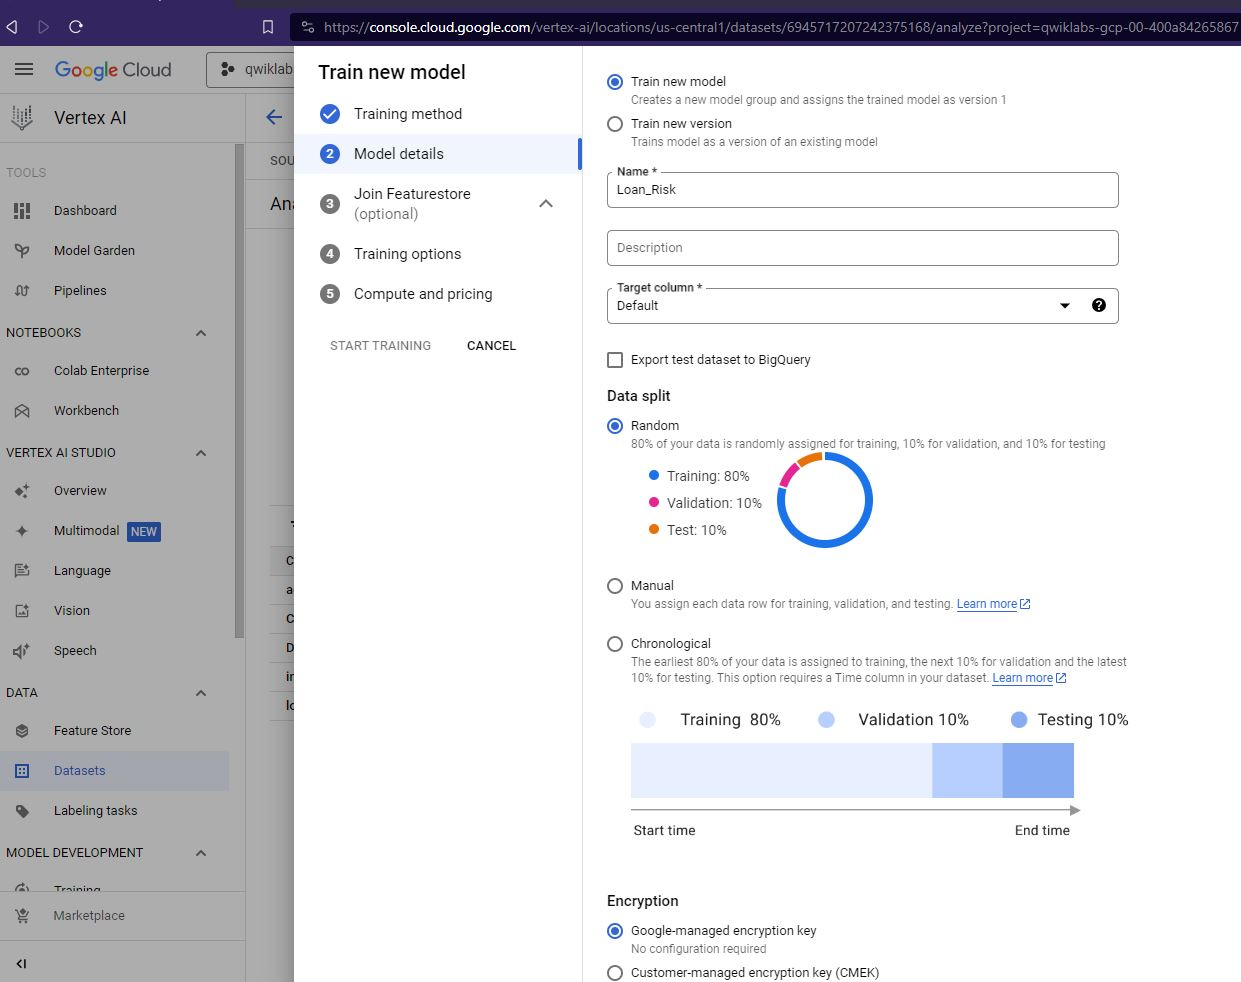

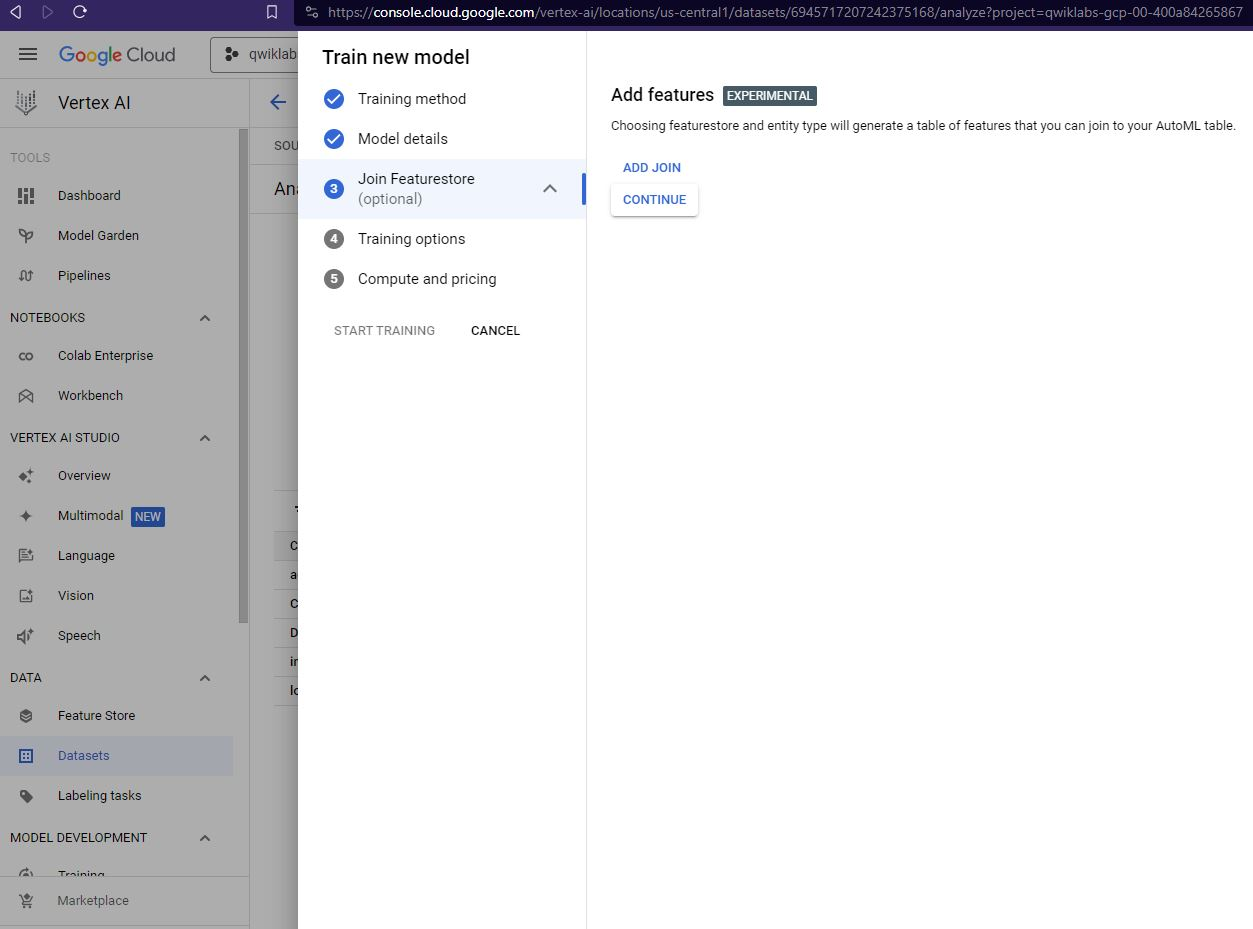

### Training options
Specify which columns you want to include in the training model. For example, ClientID might be irrelevant to predict loan risk.

1. Click the minus sign on the `ClientID` row to exclude it from the training model.

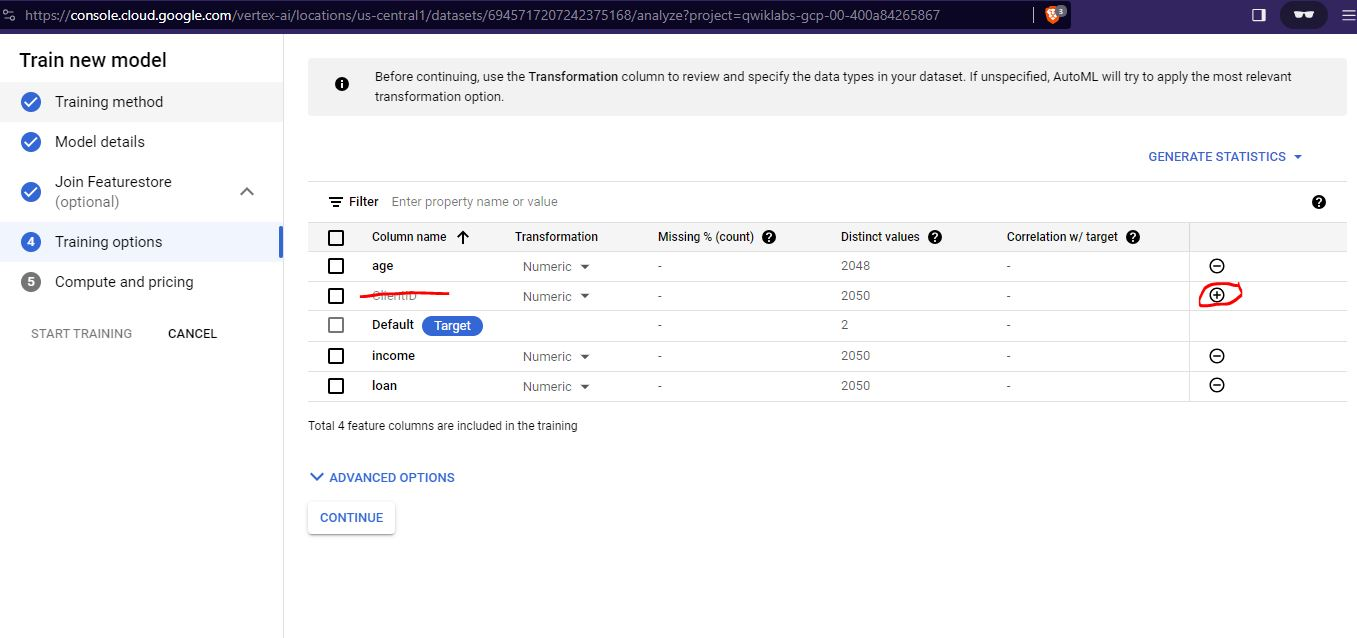

2. (Optional) Explore Advanced options to select different optimization objectives.

For more information about optimization objectives for tabular AutoML models, refer to the [Optimization objectives for tabular AutoML models guide](https://cloud.google.com/vertex-ai/docs/training/tabular-opt-obj).

3. Click `Continue`.

### Compute and pricing
1. For Budget, which represents the number of node hours for training, enter 1.
Training your AutoML model for 1 compute hour is typically a good start for understanding whether there is a relationship between the features and label you've selected. From there, you can modify your features and train for more time to improve model performance.

2. Leave early stopping Enabled.

3. Click Start training.

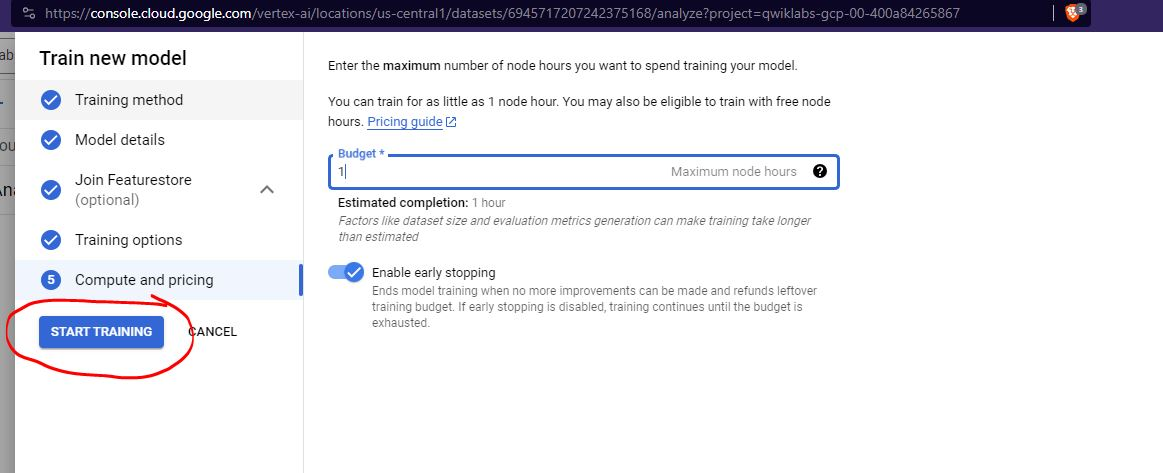

Depending on the data size and the training method, the training can take from a few minutes to a couple of hours. Normally you would receive an email from Google Cloud when the training job is complete. However, in the Qwiklabs environment, you will not receive an email.

To save the waiting for the model training, you download a pre-trained model in Task 5 to get predictions in Task 6. This pre-trained model is the training result following the same steps from Task 1 to Task 2.

### Task 3. Evaluate the model performance (demonstration only

Vertex AI provides many metrics to evaluate the model performance. You focus on three:

- Precision/Recall curve
- Confusion Matrix
- Feature Importance

> Note: If you had a model trained, you could navigate to the Model Registry tab in Vertex AI.

1. Navigate to the `Model Registry`.
2. Click on the model you just trained.
3. Browse the Evaluate tab.

However in this lab, you can skip this step since you use a pre-trained model.

The precision/recall curve

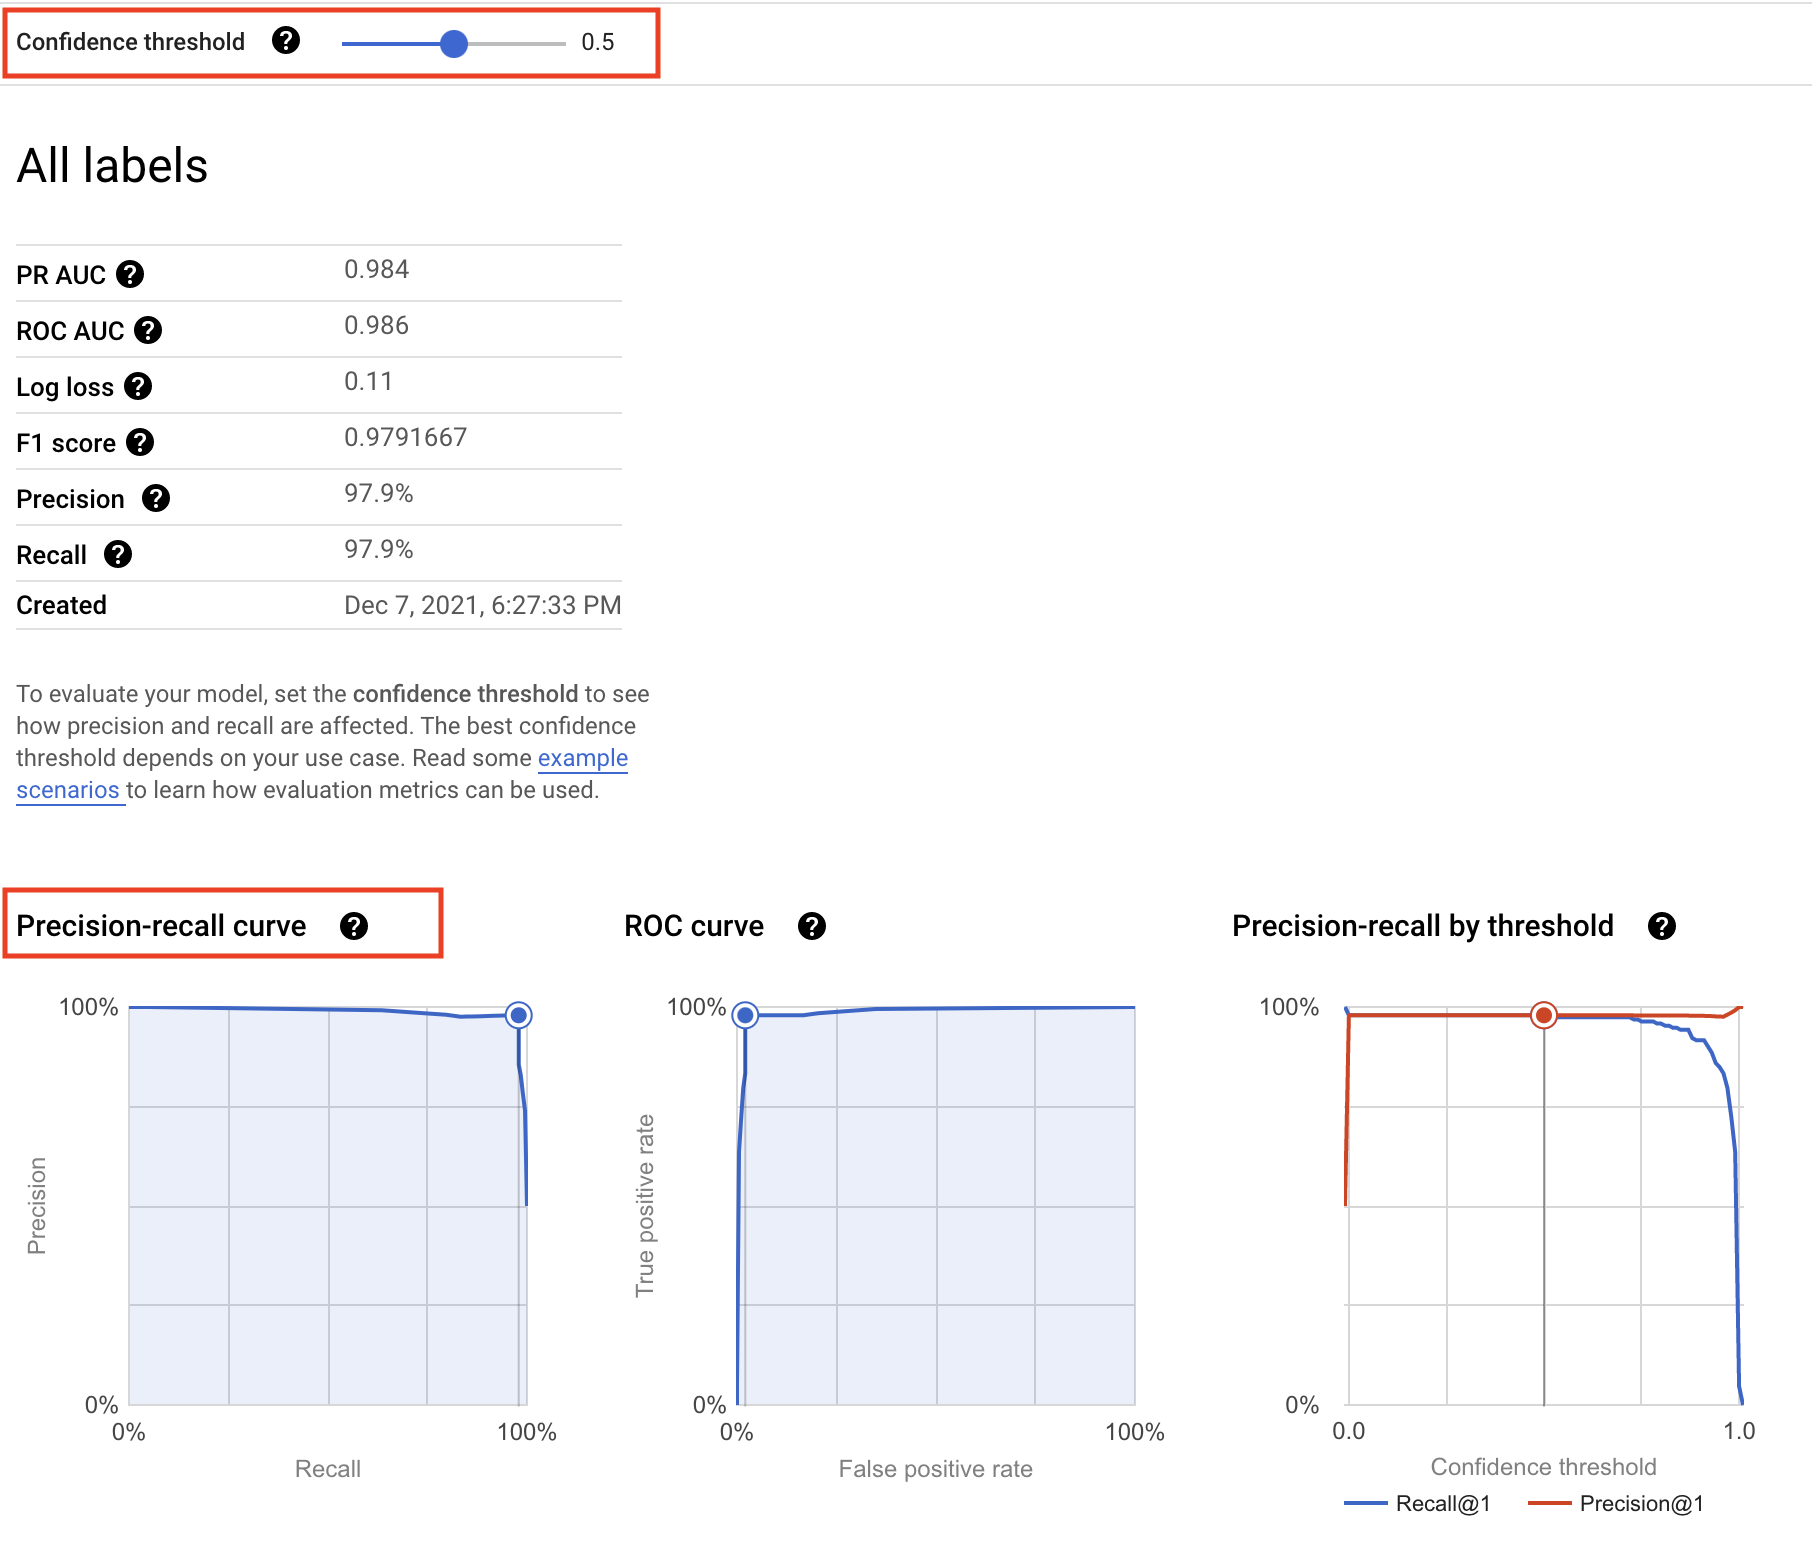

The confidence threshold determines how a ML model counts the positive cases. A higher threshold increases the precision, but decreases recall. A lower threshold decreases the precision, but increases recall.

You can manually adjust the threshold to observe its impact on precision and recall and find the best tradeoff point between the two to meet your business needs.


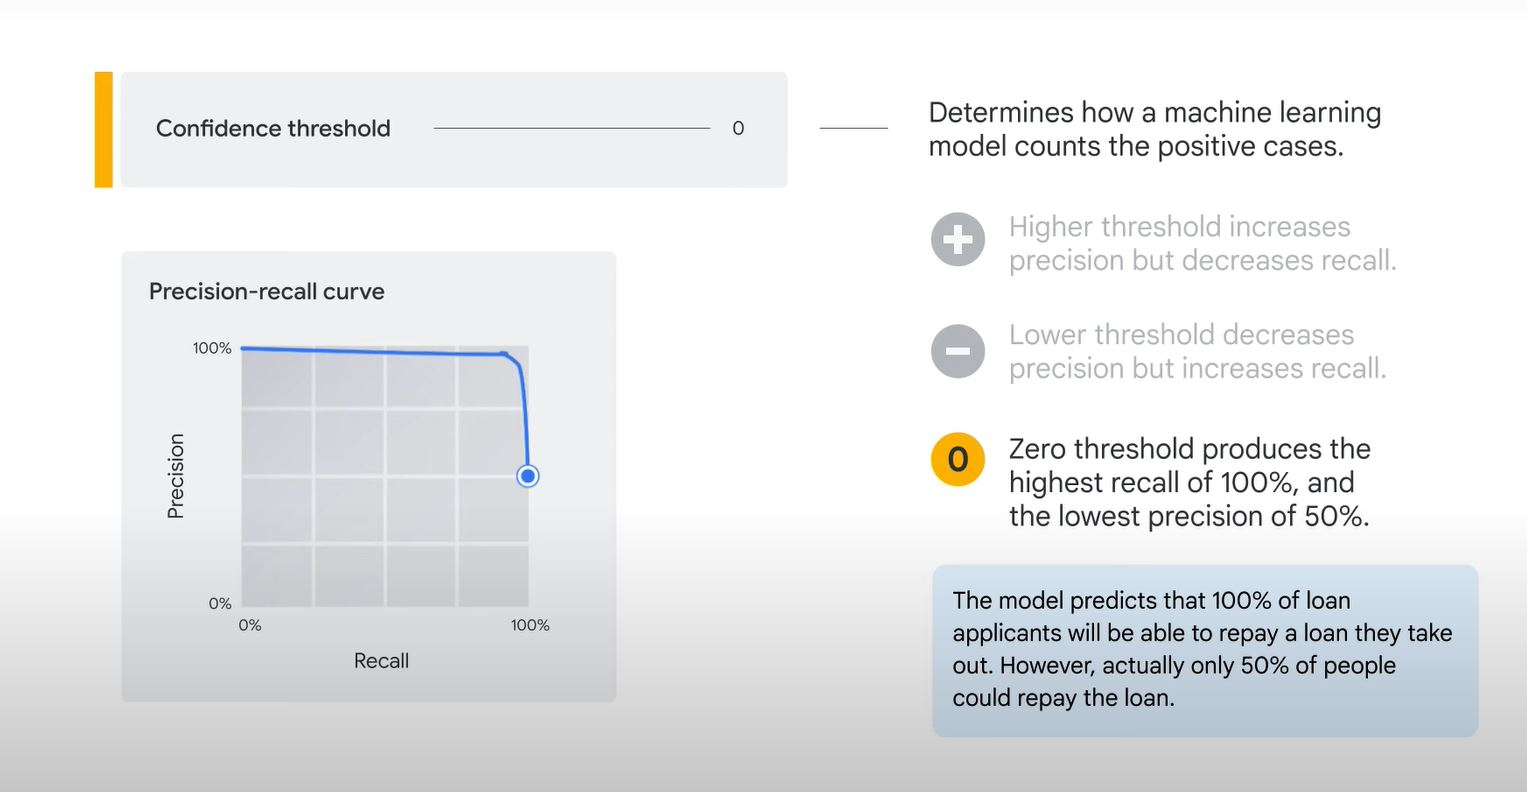

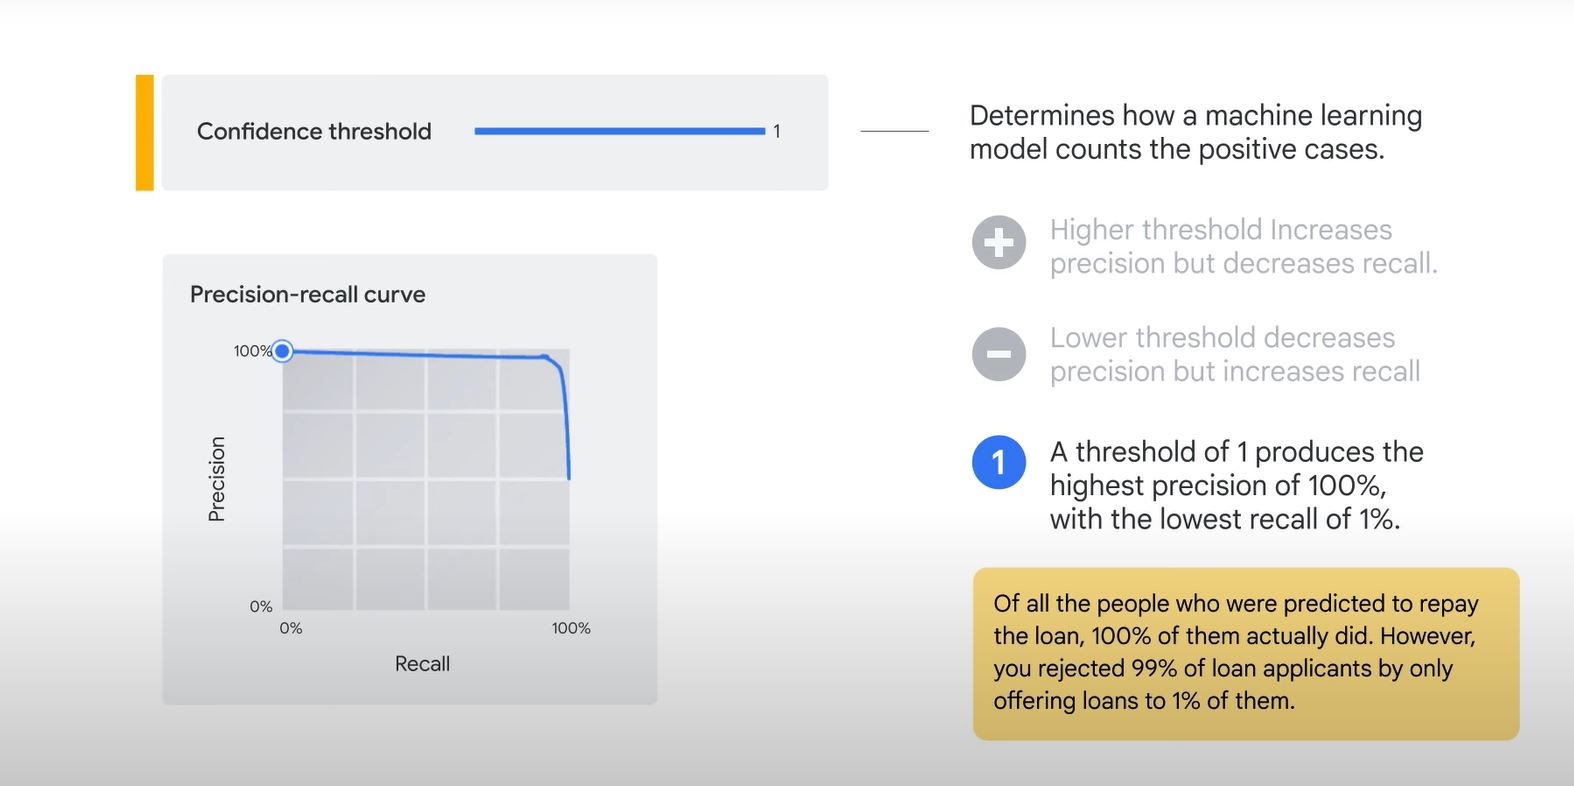


### The confusion matrix

A confusion matrix tells you the percentage of examples from each class in your test set that your model predicted correctly.

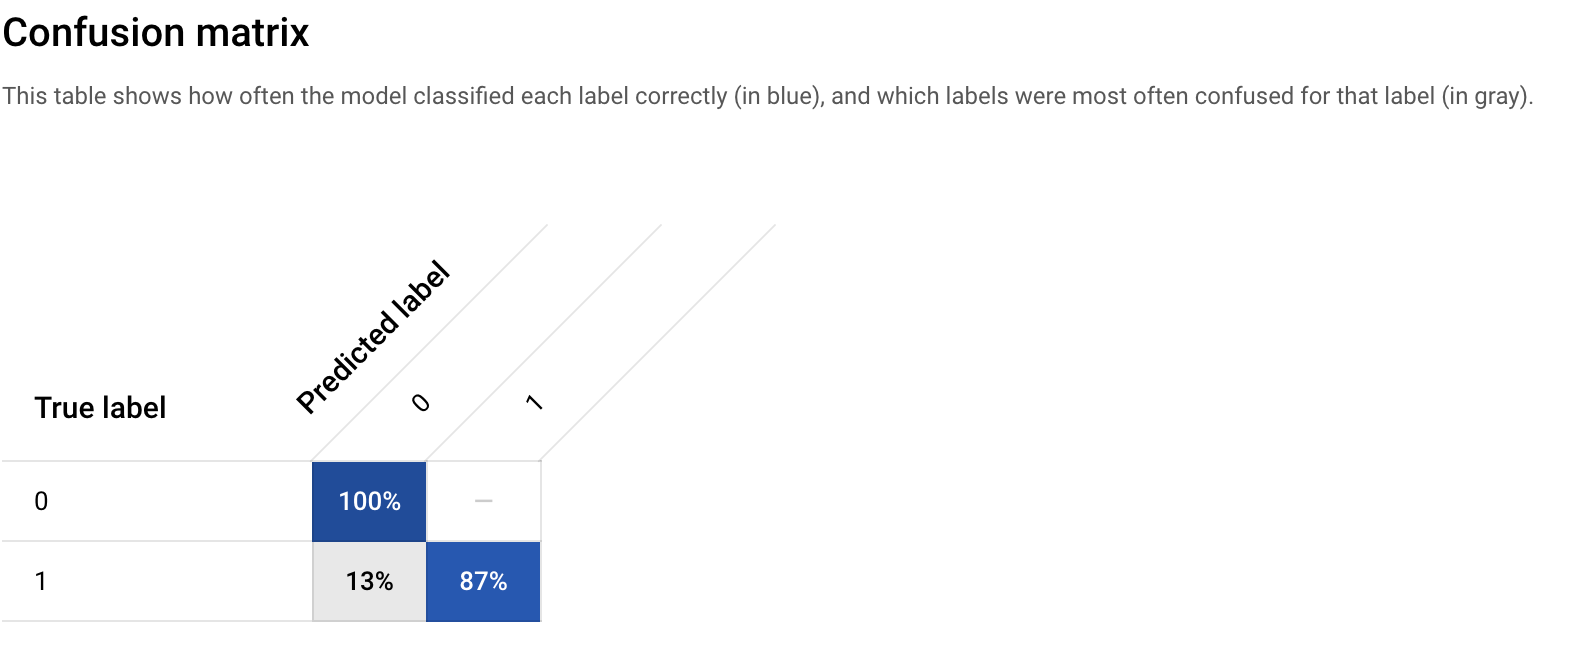

The confusion matrix shows that your initial model is able to predict 100% of the repay examples and 87% of the default examples in your test set correctly, which is not too bad.

You can improve the percentage by adding more examples (more data), engineering new features, and changing the training method, etc.

### The feature importance
In Vertex AI, feature importance is displayed through a bar chart to illustrate how each feature contributes to a prediction. The longer the bar, or the larger the numerical value associated with a feature, the more important it is.

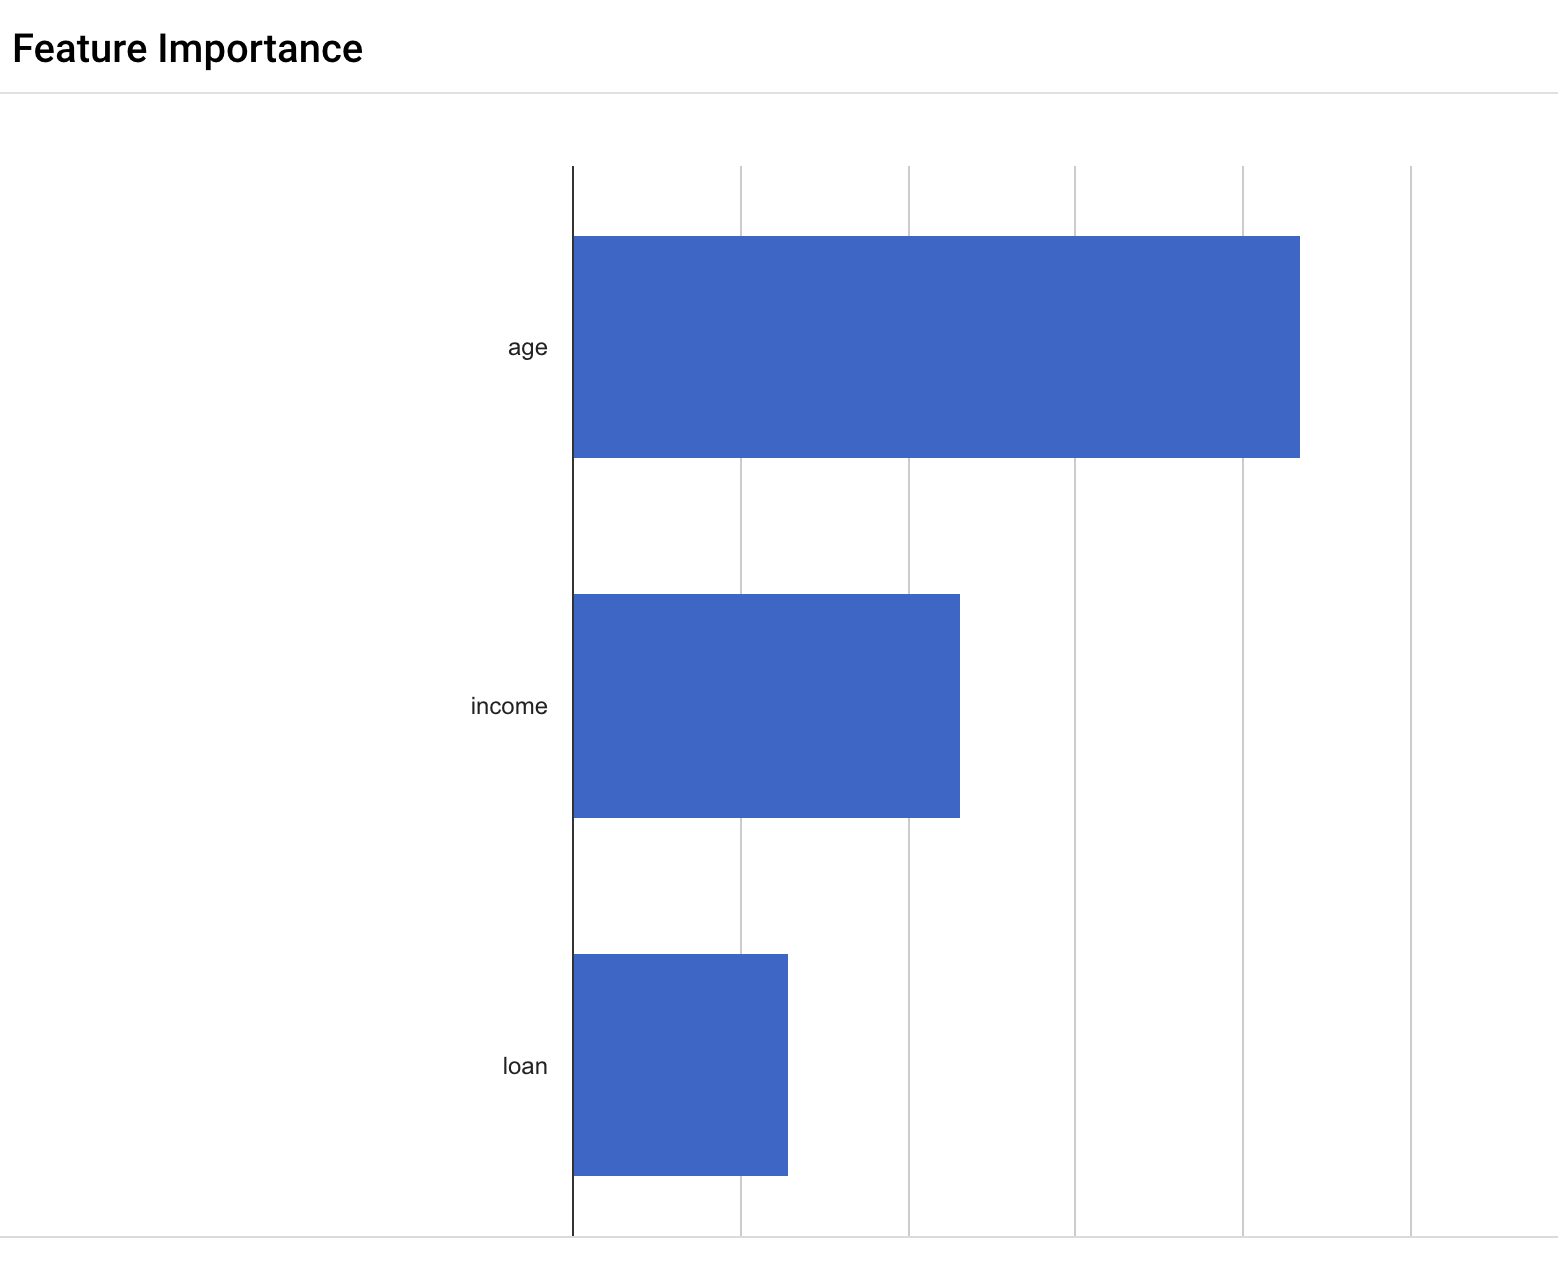

These feature importance values could be used to help you improve your model and have more confidence in its predictions. You might decide to remove the least important features next time you train a model or to combine two of the more significant features into a [feature cross](https://developers.google.com/machine-learning/glossary#feature-cross) to see if this improves model performance.

Feature importance is just one example of Vertex AI’s comprehensive machine learning functionality called Explainable AI. Explainable AI is a set of tools and frameworks to help understand and interpret predictions made by machine learning models.



### Task 4. Deploy the model (demonstration only)

>Note: You will not deploy the model to an endpoint because the model training can take an hour. Here you can review the steps you would perform in a production environment.

Now that you have a trained model, the next step is to create an endpoint in Vertex. A model resource in Vertex can have multiple endpoints associated with it, and you can split traffic between endpoints.

### Create and define an endpoint
1. On your model page, click Deploy & test, and then click Deploy to Endpoint.

2. For Endpoint name, type `Loan_Risk`

3. Click Continue.

### Model settings and monitoring
1. Leave the traffic splitting settings as-is.

2. For Machine type, select e2-standard-8, 8 vCPUs, 30 GiB memory.

3. For Explainability Options, click Feature attribution.

4. Click Done.

5. Click Continue.

6. In Model monitoring, click Continue.

7. In Model objectives > Training data source, select Vertex AI dataset.

8. Select your dataset from the drop down menu.

9. In Target column, type Default

10. Leave the remaining settings as-is and click Deploy.

Your endpoint will take a few minutes to deploy. When it is completed, a green check mark will appear next to the name.

Now you're ready to get predictions on your deployed model.

### Task 5. SML Bearer Token

### Retrieve your Bearer Token
To allow the pipeline to authenticate, and be authorized to call the endpoint to get the predictions, you will need to provide your Bearer Token.

>Note: Follow the instructions below to get your token. If you have issues getting the Bearer Token, this can be due to cookies in the incognito window. If this is happening to you, try this step in a non-incognito window.

1. Log in to gsp-auth-kjyo252taq-uc.a.run.app

2. When logging in, use your student email address and password.

3. Click the Copy button. This will copy a very long token to your clipboard.

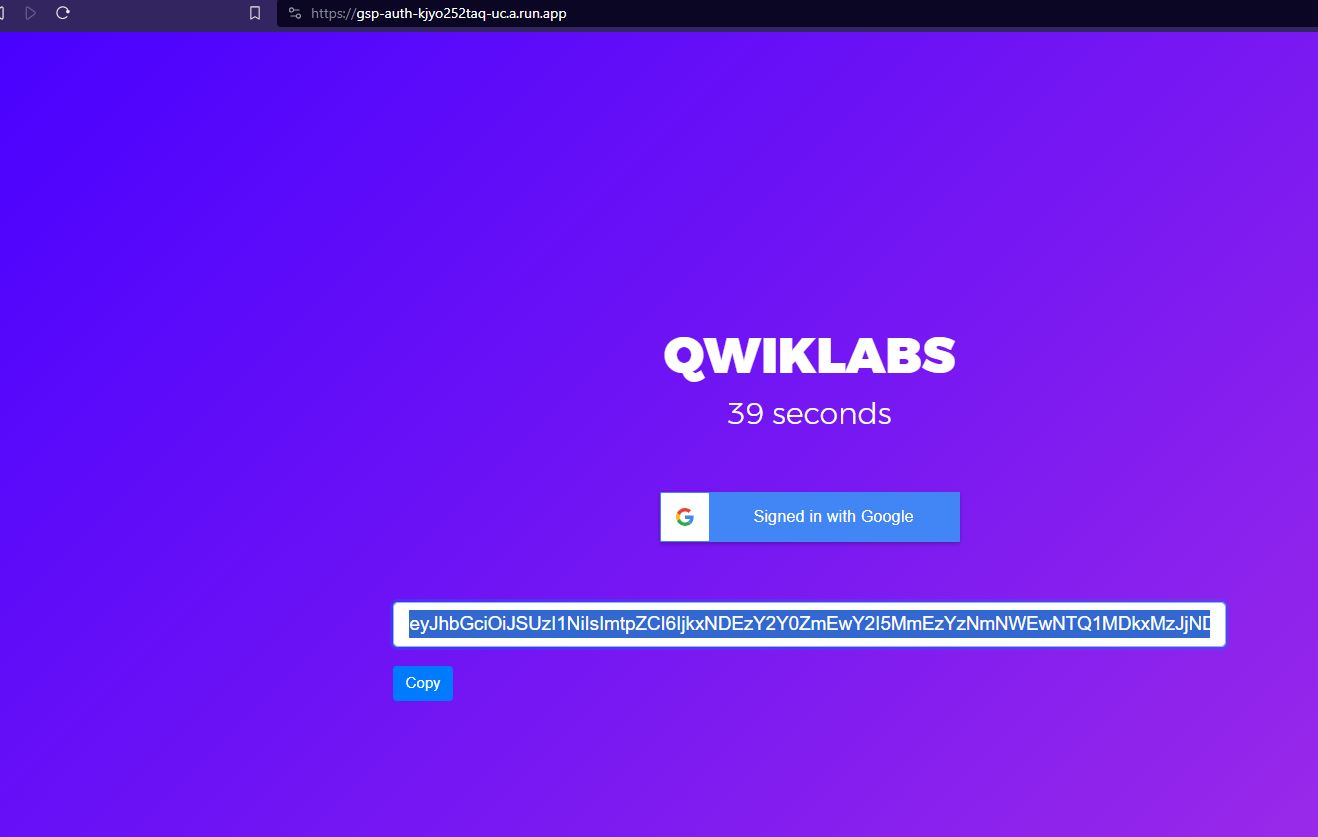

>Note: This token will only be available for about 60 seconds, so copy and and move on to the next steps.
>Note: If you have issues getting the Bearer Token, this can be due to cookies in the incognito window - try in a non-incognito window.

### Task 6. Get predictions

In this section, use the Shared Machine Learning (SML) service to work with an existing trained model.

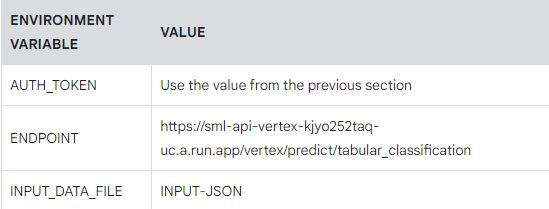

To use the trained model, you will need to create some environment variables.

1. Open a Cloud Shell window.

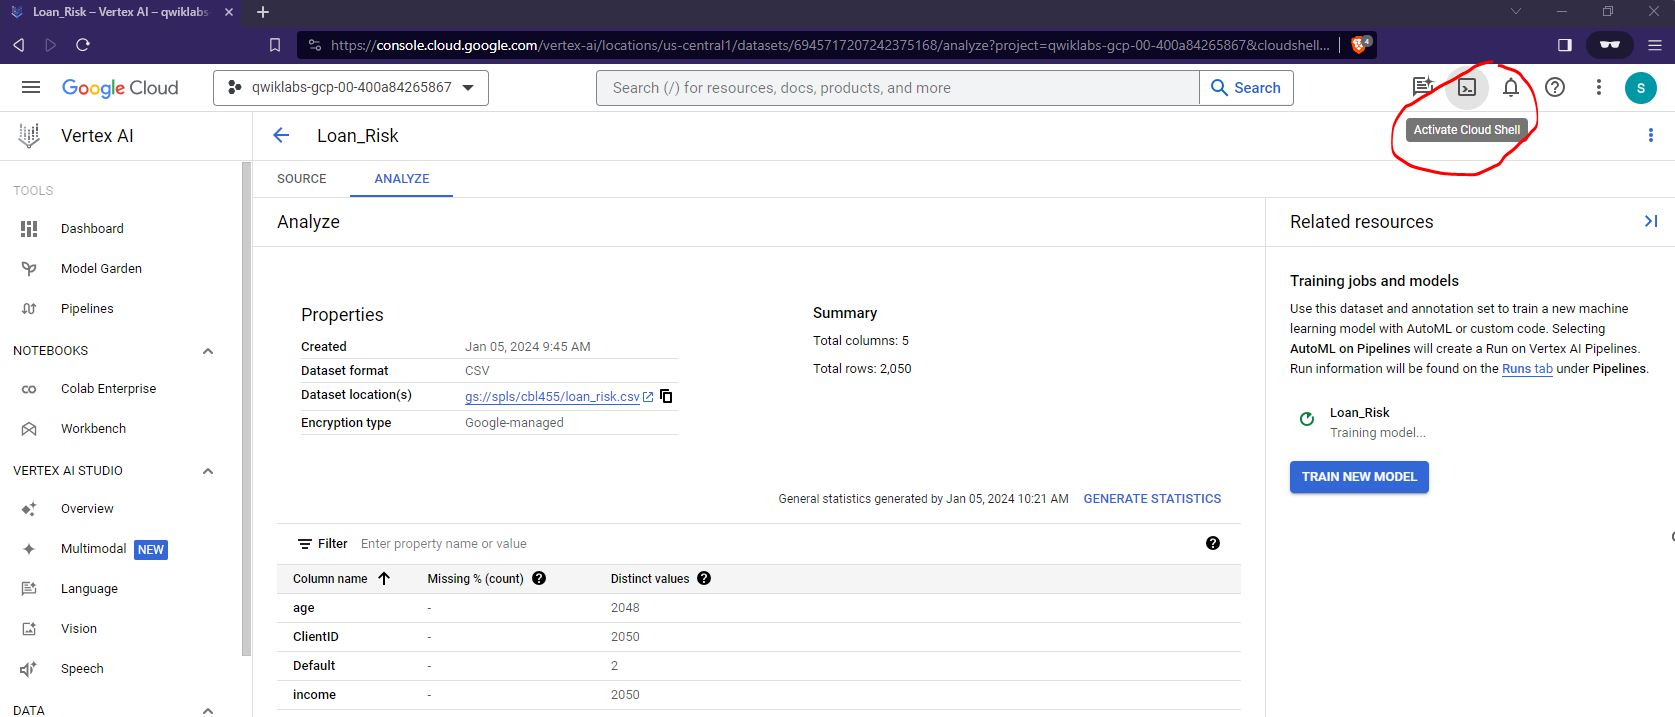

2. Replace INSERT_SML_BEARER_TOKEN with the bearer token value from the previous section:

        export AUTH_TOKEN="INSERT_SML_BEARER_TOKEN"
        
        
3. Download the lab assets:

        gcloud storage cp gs://spls/cbl455/cbl455.tar.gz .
        
4. Extract the lab assets:    

        tar -xvf cbl455.tar.gz
        
5. Create an ENDPOINT environment variable:

        export ENDPOINT="https://sml-api-vertex-kjyo252taq-uc.a.run.app/vertex/predict/tabular_classification"
        
6. Create a INPUT_DATA_FILE environment variable:

    export INPUT_DATA_FILE="INPUT-JSON" 
    
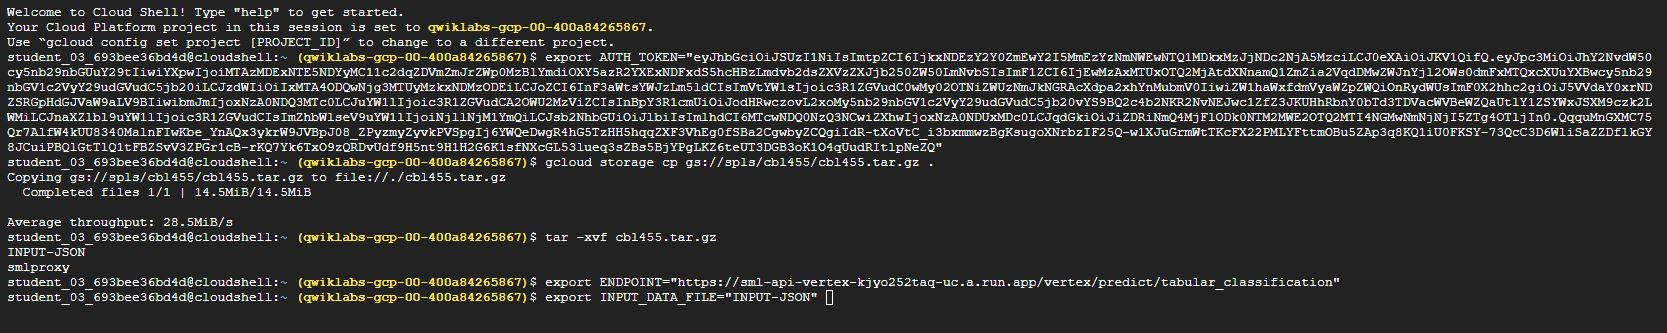
    
> Note: After the lab assets are extracted, take a moment to review the contents.

The INPUT-JSON file is used to provide Vertex AI with the model data required. Alter this file to generate custom predictions.

The `smlproxy` application is used to communicate with the backend.

The file INPUT-JSON is composed of the following values:

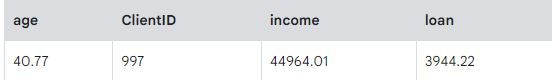

7. Test the SML Service by passing the parameters specified in the environment variables.

8. Perform a request to the SML service:

        ./smlproxy tabular \
          -a $AUTH_TOKEN \
          -e $ENDPOINT \
          -d $INPUT_DATA_FILE
          
This query should result in a response similar to this:

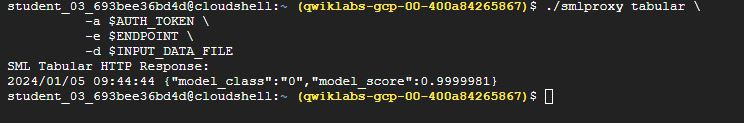

9. Alter the INPUT-JSON file to test a new scenario, using:

        nano INPUT-JSON
        
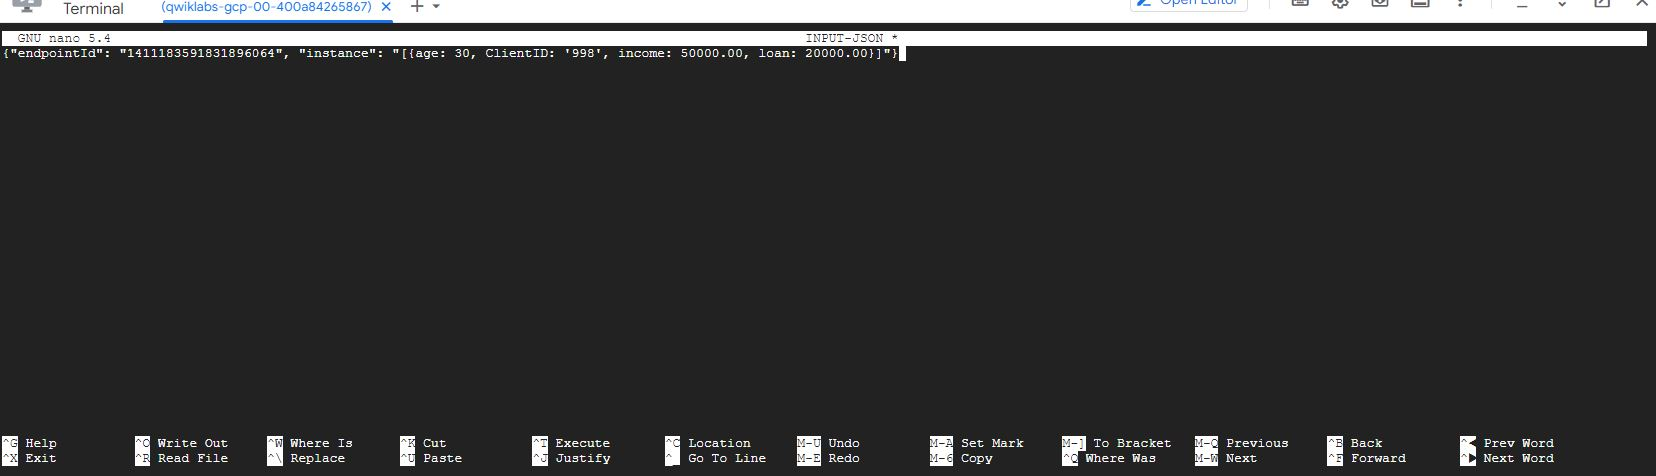
        
Press CTRL+X to exit nano, then Y to save the file, then ENTER to confirm.

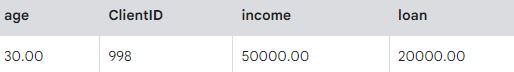

10. Test the SML Service by passing the parameters specified in the environment variables.

11. Perform a request to the SML service:

        ./smlproxy tabular \
          -a $AUTH_TOKEN \
          -e $ENDPOINT \
          -d $INPUT_DATA_FILE
          

In this case, assuming that the person's income is 50,000, age 30, and loan 20,000, the model predicts that this person will repay the loan.

This query should result in a response similar to this:

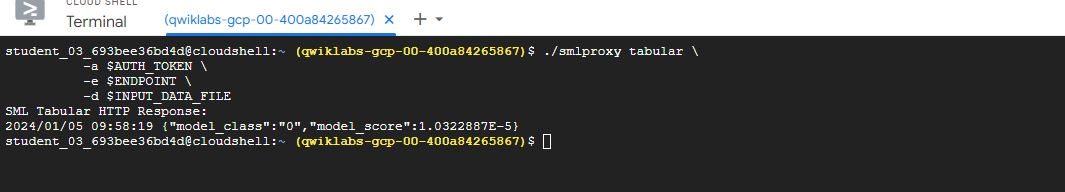

If you use the Google Cloud console, the following image illustrates how the same action could be performed:

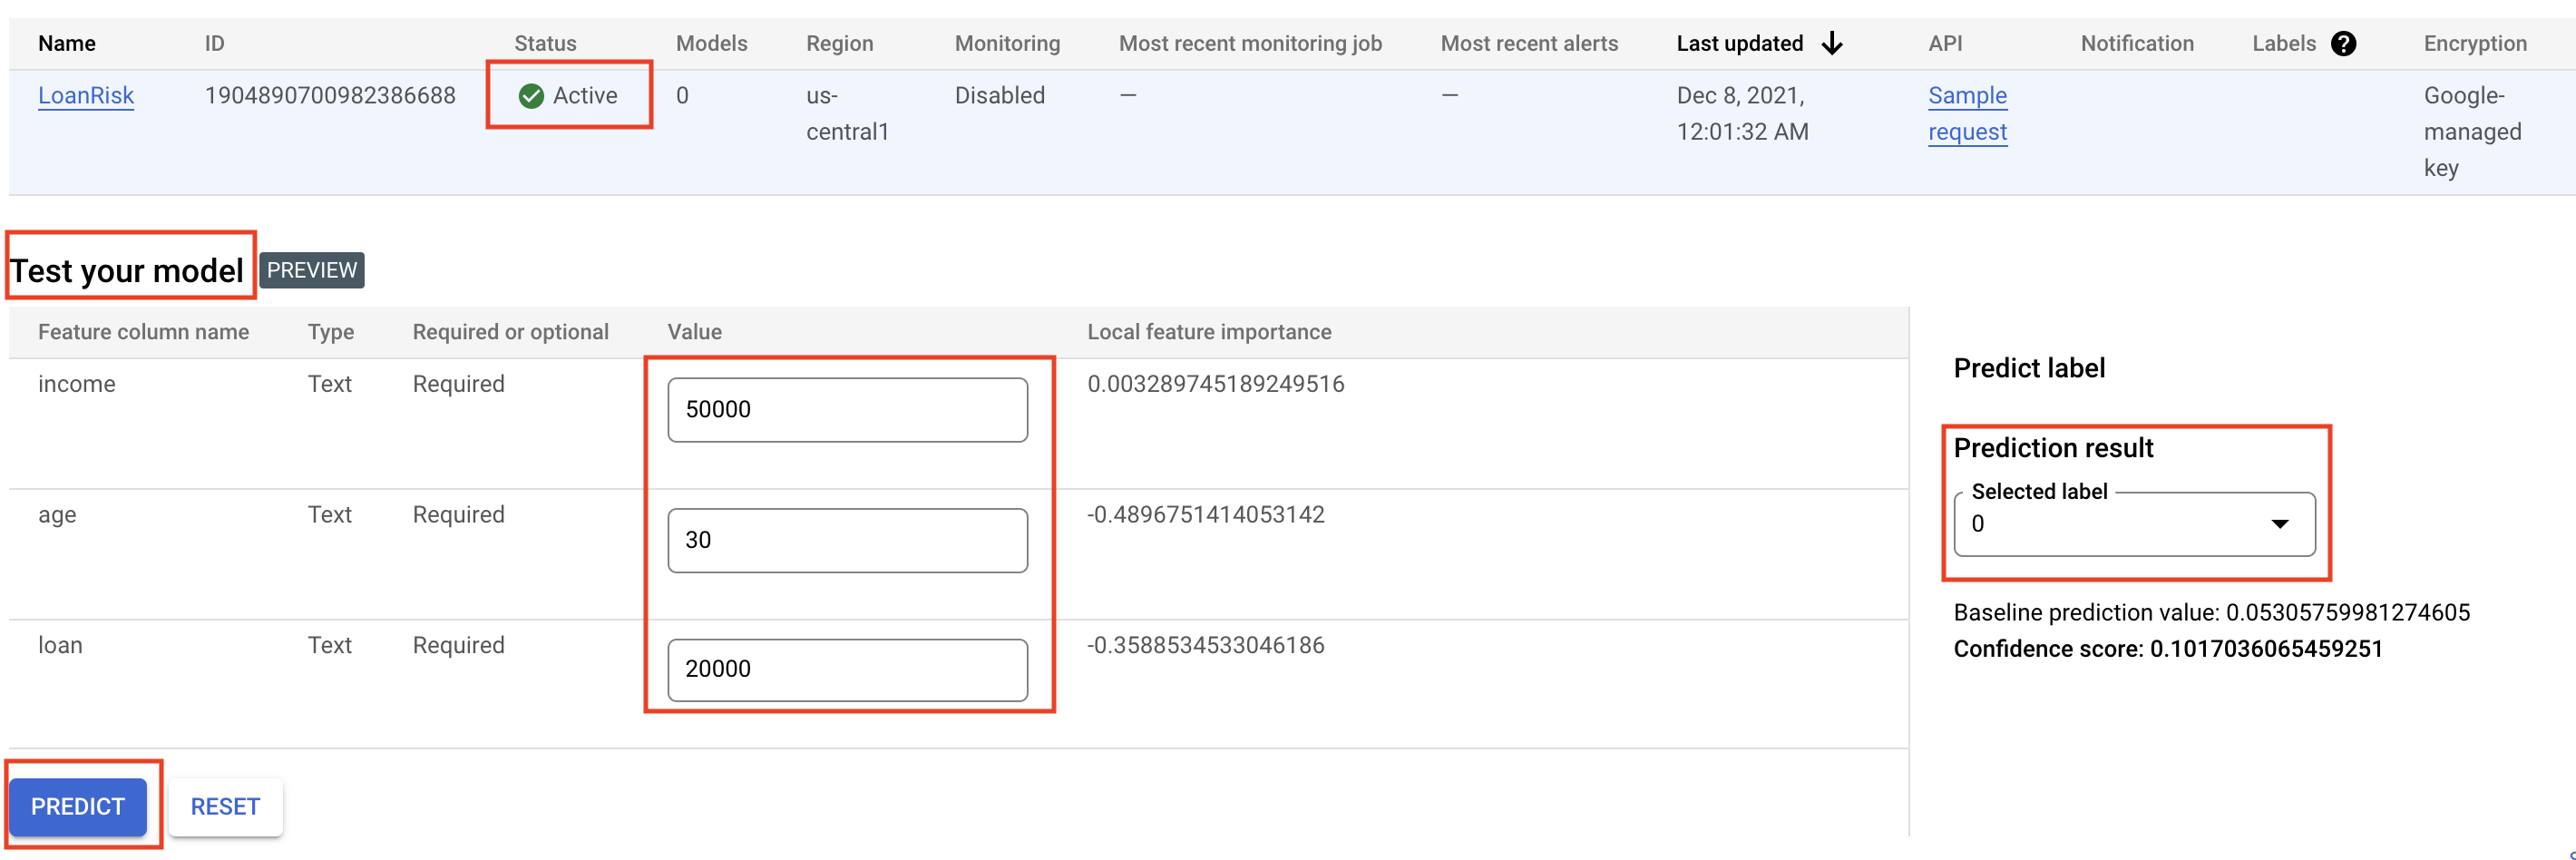

### Key Takeaways

You can now use Vertex AI to:

- Upload a dataset.
- Train a model with AutoML.
- Evaluate the model performance.
- Deploy the trained AutoML model to an endpoint.
- Get predictions.

To learn more about different parts of Vertex AI, refer to the [Vertex AI documentation](https://cloud.google.com/ai-platform-unified/docs?utm_source=codelabs&utm_medium=et&utm_campaign=CDR_sar_aiml_vertexio_&utm_content=-).